In [1]:
import sys
import os

# Adiciona o diretório src ao sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Importa os módulos
from process_tiffs import save_masked_tiff, extract_classification_info, plot_tiff_with_classes

In [2]:
import pandas as pd
import numpy as np
import glob
import requests
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.spatial import Voronoi
from shapely.geometry import Polygon
import seaborn as sns
from shapely.geometry import Point

# Temperatura ao decorrer dos anos

In [3]:
path = '../dados/estacoes'  
all_files = glob.glob(path + "/*.csv")  

In [4]:
all_data = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    all_data.append(df)

combined_data = pd.concat(all_data, axis=0, ignore_index=True)

In [5]:
combined_data.head()

,mes,hora,precipitacao_total,pressao_atm_hora,pressao_atm_max,pressao_atm_min,radiacao_global,temperatura_bulbo_hora,temperatura_orvalho_hora,temperatura_orvalho_max,...,umidade_rel_min,umidade_rel_hora,vento_direcao,vento_rajada_max,vento_velocidade,temperatura_min,data,id_estacao,ano,temperatura_max
0,5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.184187,2003-05-26,A412,2003,31.006134
1,5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.423990,2003-05-27,A412,2003,31.069967
2,5,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.347433,2003-05-27,A412,2003,31.033491
3,5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.179983,2003-05-28,A412,2003,31.019276
4,5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.190351,2003-05-29,A412,2003,30.994087


In [68]:
combined_data['id_estacao'].unique()

array(['A305', 'A306', 'A307', 'A308', 'A408', 'A412', 'A310', 'A309',
       'A313', 'A526', 'A539', 'A543', 'A314', 'A315', 'A316', 'A317',
       'A318', 'A319', 'A321', 'A322', 'A323', 'A324', 'A325', 'A327',
       'A329', 'A330', 'A331', 'A332', 'A333', 'A334', 'A336', 'A337',
       'A339', 'A340', 'A413', 'A415', 'A416', 'A417', 'A418', 'A419',
       'A420', 'A423', 'A424', 'A425', 'A426', 'A428', 'A429', 'A430',
       'A432', 'A433', 'A435', 'A436', 'A439', 'A440', 'A441', 'A442',
       'A443', 'A342', 'A349', 'A343', 'A328', 'A345', 'A347', 'A348',
       'A350', 'A351', 'A354', 'A358', 'A359', 'A360', 'A365', 'A366',
       'A367', 'A448', 'A450', 'A559', 'A563', 'A449', 'A454', 'A451',
       'A453', 'A370', 'A371', 'A372', 'A373', 'A368', 'A369', 'A458'],
      dtype=object)

In [6]:
# Novo dataset com as colunas de interesse
temperaturas = combined_data[['data', 'temperatura_max', 'temperatura_min', 'ano']]

# Agrupar por ano
temperatura_anual = temperaturas.groupby('ano').agg({
    'temperatura_max': 'mean',
    'temperatura_min': 'mean'
}).reset_index()

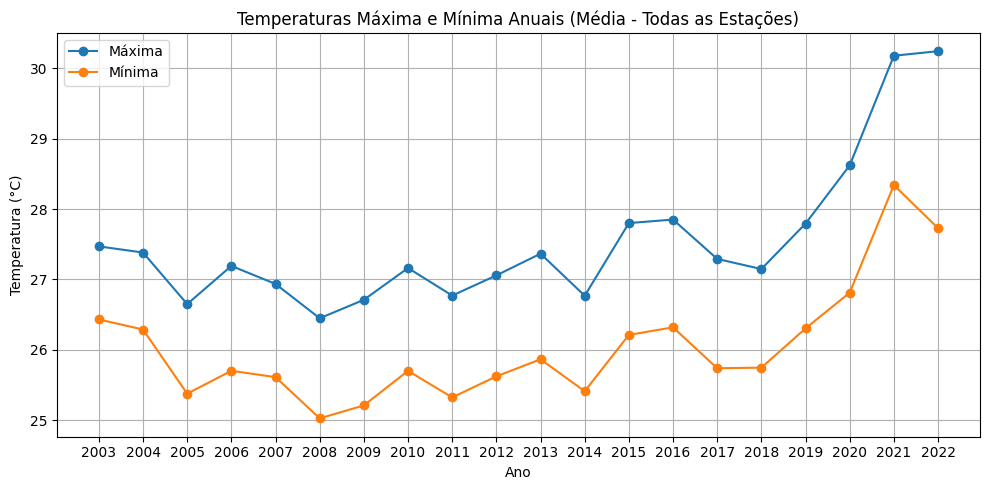

In [9]:
# Visualizar a série temporal
# Criando o gráfico
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_max'], label='Máxima', marker='o')
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_min'], label='Mínima', marker='o')

plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máxima e Mínima Anuais (Média - Todas as Estações)')
plt.xticks(range(2003, 2023))  # Define os ticks do eixo x para cada ano de 2003 a 2022
plt.legend()
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.tight_layout()  # Ajusta automaticamente os subplots para dar espaço ao conteúdo
plt.show()

# Segmentações ao decorrer dos anos

In [ ]:
# Diretório onde os arquivos serão salvos
save_dir = '../dados/segmentacoes'

# Lista de anos
years = range(2003, 2022)  

# Loop para baixar os arquivos
for year in years:
    # Construindo a URL para o ano atual
    url = f'https://storage.googleapis.com/mapbiomas-public/initiatives/brasil/collection_8/lclu/coverage/brasil_coverage_{year}.tif'
    
    # Nome do arquivo local onde o TIF será salvo
    local_filename = f'{save_dir}brasil_coverage_{year}.tif'

    # Fazendo a requisição para baixar o arquivo
    response = requests.get(url)
    
    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Garantindo que o diretório exista
        os.makedirs(save_dir, exist_ok=True)
        
        # Escrevendo o conteúdo do arquivo baixado no arquivo local
        with open(local_filename, 'wb') as file:
            file.write(response.content)
        print(f'Arquivo {local_filename} baixado e salvo com sucesso.')
    else:
        print(f'Falha ao baixar o arquivo para o ano {year}.')

Arquivo ../dados/segmentacoesbrasil_coverage_2000.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2001.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2002.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2003.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2004.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2005.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2006.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2007.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2008.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2009.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2010.tif baixado e salvo com sucesso.
Arquivo ../dados/segmentacoesbrasil_coverage_2011.tif baixado e salvo com sucesso.
Arqu

## Agora precisamos delimitar pelas estações na região da caatinga

In [4]:
import basedosdados as bd

In [5]:
# Caminho para o shapefile dos biomas
biomes_shp = '../dados/Biomas_250mil/lm_bioma_250.shp'

# Carregar o shapefile dos biomas
biomes = gpd.read_file(biomes_shp)

# Filtrar para obter apenas a Caatinga
caatinga = biomes[biomes['Bioma'] == 'Caatinga']

# Para carregar o dado direto no pandas
df_estacoes = bd.read_table(dataset_id='br_inmet_bdmep',
table_id='estacao',
billing_project_id="projetopdi-430718")

# Convertendo o DataFrame em GeoDataFrame
gdf_estacoes = gpd.GeoDataFrame(
    df_estacoes, 
    geometry=gpd.points_from_xy(df_estacoes['longitude'], df_estacoes['latitude']),
    crs="EPSG:4674"
)

# Reprojetar o GeoDataFrame das estações para o mesmo CRS que o shapefile dos biomas
gdf_estacoes = gdf_estacoes.to_crs(caatinga.crs)

# Filtrar as estações que estão dentro da Caatinga
stations_within_caatinga = gdf_estacoes[gdf_estacoes.geometry.within(caatinga.unary_union)]

# Dropar colunas que não serão utilizadas
stations_within_caatinga = stations_within_caatinga.drop(columns=['id_municipio', 'estacao','data_fundacao','altitude'])

Downloading: 100%|██████████| 612/612 [00:00<00:00, 1211.59rows/s]


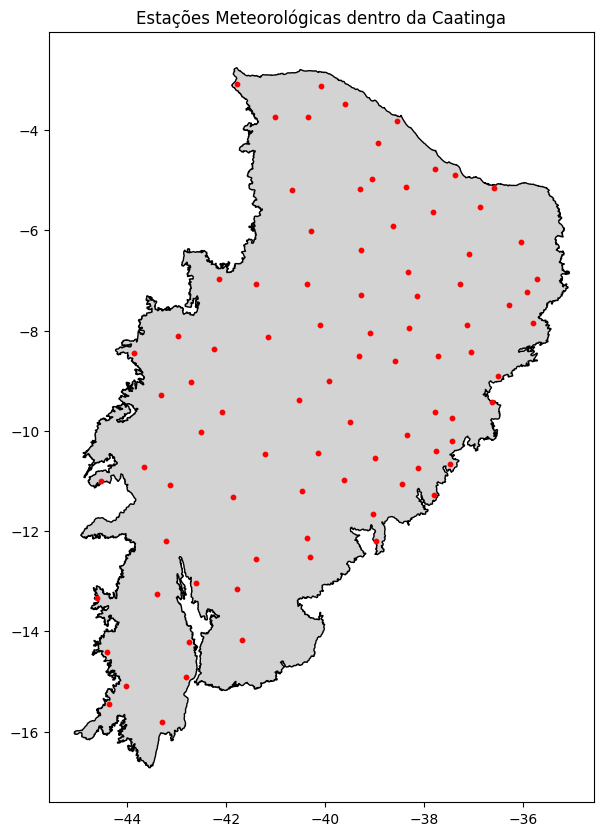

In [291]:
# Plotar um mapa com as estações
fig, ax = plt.subplots(figsize=(10, 10))
caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')
stations_within_caatinga.plot(ax=ax, color='red', markersize=10)
plt.title('Estações Meteorológicas dentro da Caatinga')
plt.show()

Precisamos dividir o mapa de acordo com as estações

In [292]:
# Filtrar as estações que estão dentro da Caatinga
stations_within_caatinga = gdf_estacoes[gdf_estacoes.geometry.within(caatinga.unary_union)]

# Extrair as coordenadas das estações
coords = np.array(list(zip(stations_within_caatinga.geometry.x, stations_within_caatinga.geometry.y)))

# Adicionar pontos fictícios ao redor do perímetro da Caatinga
minx, miny, maxx, maxy = caatinga.total_bounds
padding = 0.5  # Ajuste conforme necessário
extra_points = [
    [minx - padding, miny - padding],
    [minx - padding, maxy + padding],
    [maxx + padding, miny - padding],
    [maxx + padding, maxy + padding]
]

# Adicionar os novos pontos às coordenadas das estações
all_points = np.vstack([coords, extra_points])

# Gerar os polígonos de Voronoi com os pontos adicionais
vor = Voronoi(all_points)

# Criar polígonos de Voronoi a partir dos vértices
polygons = []
for region in vor.regions:
    if not -1 in region and region:
        polygon = Polygon([vor.vertices[i] for i in region])
        polygons.append(polygon)

# Criar um GeoDataFrame com os polígonos de Voronoi
gdf_voronoi = gpd.GeoDataFrame(geometry=polygons, crs=stations_within_caatinga.crs)

# Verificar e corrigir geometrias inválidas antes do clipping
gdf_voronoi['geometry'] = gdf_voronoi['geometry'].buffer(0)

# Clipping com o polígono da Caatinga para garantir que todos os polígonos estejam dentro da região
gdf_voronoi_clipped = gpd.GeoDataFrame(
    geometry=[poly.intersection(caatinga.unary_union) for poly in gdf_voronoi.geometry if not poly.is_empty],
    crs=gdf_voronoi.crs
)

# Remover geometrias vazias
gdf_voronoi_clipped = gdf_voronoi_clipped[~gdf_voronoi_clipped.is_empty]

In [293]:
# Associar o polígono ao ID da estação mais próxima
def find_nearest_station(polygon, stations):
    centroid = polygon.centroid
    distances = stations.geometry.apply(lambda x: centroid.distance(x))
    nearest_station = stations.loc[distances.idxmin()]
    return nearest_station['id_estacao'],nearest_station.geometry.y, nearest_station.geometry.x

# Aplicar a função para encontrar o ID da estação, latitude e longitude
gdf_voronoi_clipped[['id_estacao', 'latitude', 'longitude']] = gdf_voronoi_clipped.geometry.apply(
    lambda poly: find_nearest_station(poly, stations_within_caatinga)
).apply(pd.Series)

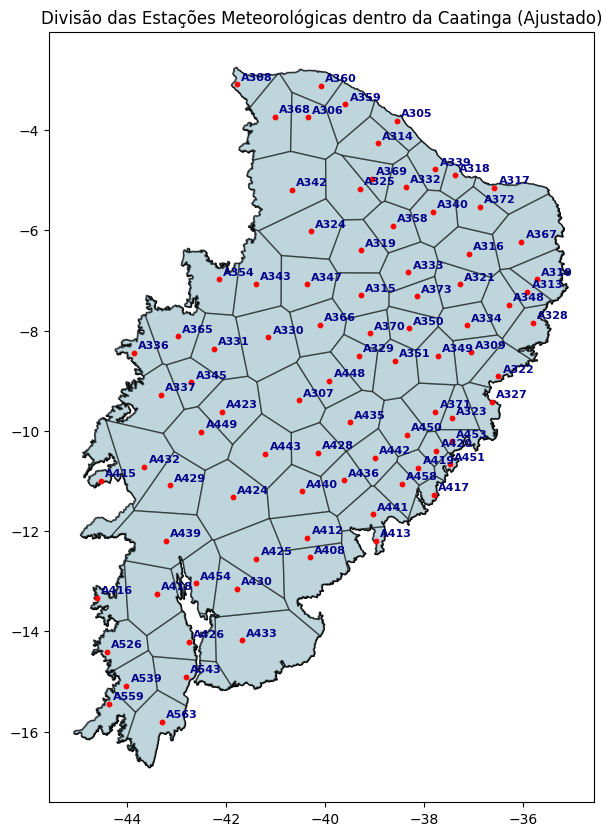

In [294]:
# Plotar o resultado ajustado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o perímetro da Caatinga
caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os polígonos de Voronoi
gdf_voronoi_clipped.plot(ax=ax, edgecolor='black', color='lightblue', alpha=0.5)

# Plotar as estações meteorológicas
stations_within_caatinga.plot(ax=ax, color='red', markersize=10)

# Adicionar o ID das estações no plot
for x, y, label in zip(stations_within_caatinga.geometry.x, stations_within_caatinga.geometry.y, stations_within_caatinga['id_estacao']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='darkblue', weight='bold')

plt.title('Divisão das Estações Meteorológicas dentro da Caatinga (Ajustado)')
plt.show()

In [295]:
# Salvar o shapefile resultante
gdf_voronoi_clipped.to_file('../dados/shapefile_estacoes_divididas/estacoes_territorios_dividido.shp')
gdf_voronoi_clipped.head()

,geometry,id_estacao,latitude,longitude
0,"MULTIPOLYGON (((-43.28134 -8.66269, -43.66635 ...",A336,-8.441667,-43.865556
1,"MULTIPOLYGON (((-43.28134 -8.66269, -43.63515 ...",A365,-8.117939,-42.975721
2,"MULTIPOLYGON (((-44.05675 -12.61621, -44.05717...",A416,-13.332500,-44.617500
3,"POLYGON ((-42.21703 -13.71785, -42.21693 -13.7...",A433,-14.181944,-41.672222
4,"POLYGON ((-41.52190 -3.55804, -41.52253 -3.558...",A308,-3.086667,-41.783056


# Separar os arquivos geotif por estação

In [19]:
def process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped):
    """
    Processa todos os arquivos GeoTIFF na pasta segmentacoes para todas as estações,
    salvando os resultados em pastas separadas por ano.

    Args:
    segmentacoes_dir (str): Caminho para a pasta contendo os arquivos GeoTIFF de entrada.
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes serão salvos.
    gdf_voronoi_clipped (GeoDataFrame): GeoDataFrame contendo os polígonos de Voronoi.
    """

    # Listar todos os arquivos GeoTIFF na pasta segmentacoes
    tiff_files = glob.glob(os.path.join(segmentacoes_dir, '*.tif'))

    # Obter os IDs únicos das estações
    estacao_ids = gdf_voronoi_clipped['id_estacao'].unique()

    for tiff_file in tiff_files:
        # Extrair o ano do nome do arquivo GeoTIFF
        year = os.path.basename(tiff_file).split('_')[-1].split('.')[0]

        # Criar diretório para o ano se não existir
        year_dir = os.path.join(output_base_dir, year)
        os.makedirs(year_dir, exist_ok=True)

        for estacao_id in estacao_ids:
            # Aplicar a função para salvar o TIFF mascarado
            save_masked_tiff(tiff_file, estacao_id, year_dir, gdf_voronoi_clipped)
            print(f"Salvo: {year_dir}/coverage_{estacao_id}_{year}.tif")


# Definir caminhos
segmentacoes_dir = '../dados/segmentacoes'
output_base_dir = '../dados/raster_tiff_caating'

# Executar o processamento para todos os arquivos e estações
process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped)

Salvo: ../dados/raster_tiff_caating\2003/coverage_A336_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A365_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A416_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A433_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A308_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A368_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A539_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A543_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A526_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A559_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A563_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A454_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A418_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A426_2003.tif
Salvo: ../dados/raster_tiff_caating\2003/coverage_A430_2003.tif
Salvo: ../dados/raster_tiff_caating\2003

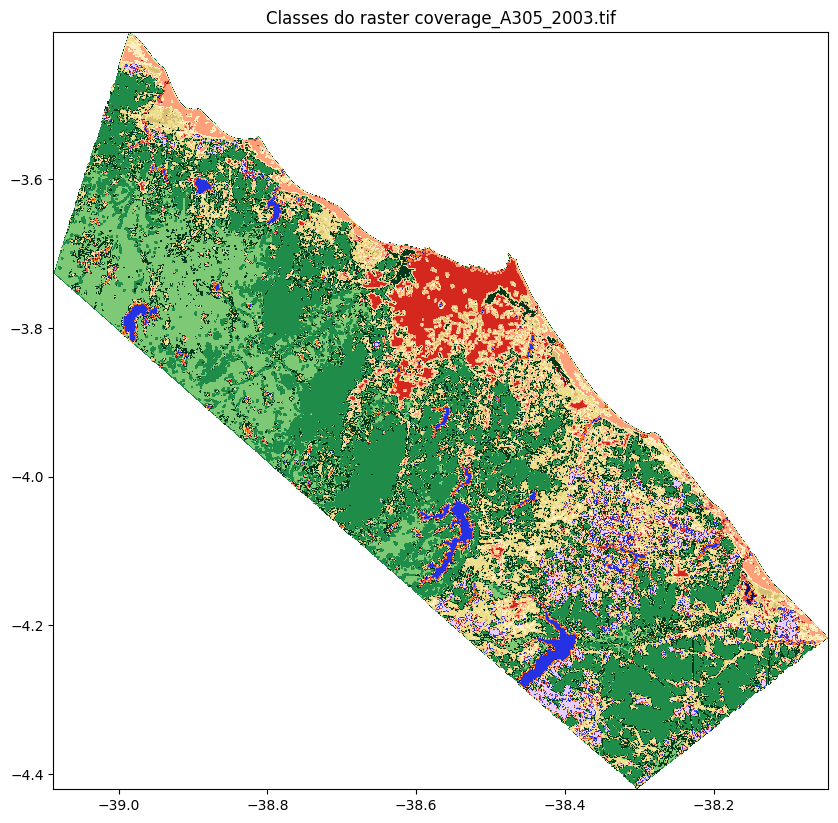

In [20]:
output_tif_path = '../dados/raster_tiff_caating/2003/coverage_A305_2003.tif'
plot_tiff_with_classes(output_tif_path)

In [21]:
# Extrair informações do GeoTIFF salvo
sorted_class_counts = extract_classification_info(output_tif_path)

# Exibir as classificações e contagens
print("Contagem de superpixels por classe (ordenado):", sorted_class_counts)

Contagem de superpixels por classe (ordenado): {31: 2574, 32: 4683, 5: 24970, 41: 34098, 25: 47489, 12: 66877, 15: 120126, 23: 140382, 48: 149318, 33: 253628, 24: 451289, 21: 884053, 4: 1389258, 3: 1874707, 0: 9162207}


## Série temporal das estações

In [10]:
# Novo dataset com as colunas de interesse
temperaturas = combined_data[['id_estacao','data', 'temperatura_max', 'temperatura_min', 'ano']]
temperaturas.head()

,id_estacao,data,temperatura_max,temperatura_min,ano
0,A412,2003-05-26,31.006134,31.184187,2003
1,A412,2003-05-27,31.069967,31.423990,2003
2,A412,2003-05-27,31.033491,31.347433,2003
3,A412,2003-05-28,31.019276,31.179983,2003
4,A412,2003-05-29,30.994087,31.190351,2003


In [11]:
# remover linhas onde data está duplicada
temperaturas = temperaturas.drop_duplicates(subset=['id_estacao','data'])
temperaturas.head()

,id_estacao,data,temperatura_max,temperatura_min,ano
0,A412,2003-05-26,31.006134,31.184187,2003
1,A412,2003-05-27,31.069967,31.423990,2003
3,A412,2003-05-28,31.019276,31.179983,2003
4,A412,2003-05-29,30.994087,31.190351,2003
5,A412,2003-05-24,31.082014,31.427912,2003


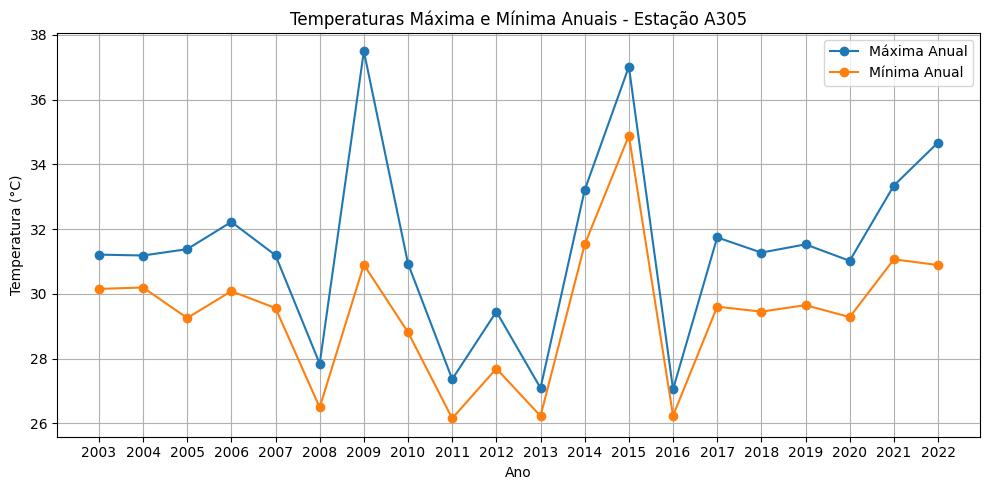

In [12]:
# Filtrar os dados apenas para a estação A305
dados_A305 = temperaturas[temperaturas['id_estacao'] == 'A306']

# Agrupar por ano e calcular a temperatura máxima e mínima anual
temperatura_anual = dados_A305.groupby('ano').agg(
    temperatura_max=('temperatura_max', 'mean'),
    temperatura_min=('temperatura_min', 'mean')
).reset_index()

# Plotar a série temporal anual
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_max'], label='Máxima Anual', marker='o')
plt.plot(temperatura_anual['ano'], temperatura_anual['temperatura_min'], label='Mínima Anual', marker='o')

plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máxima e Mínima Anuais - Estação A305')
plt.xticks(range(temperatura_anual['ano'].min(), temperatura_anual['ano'].max() + 1))  # Define os ticks do eixo x para cada ano
plt.legend()
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

## Série temporal da vegetação na região de cada estação

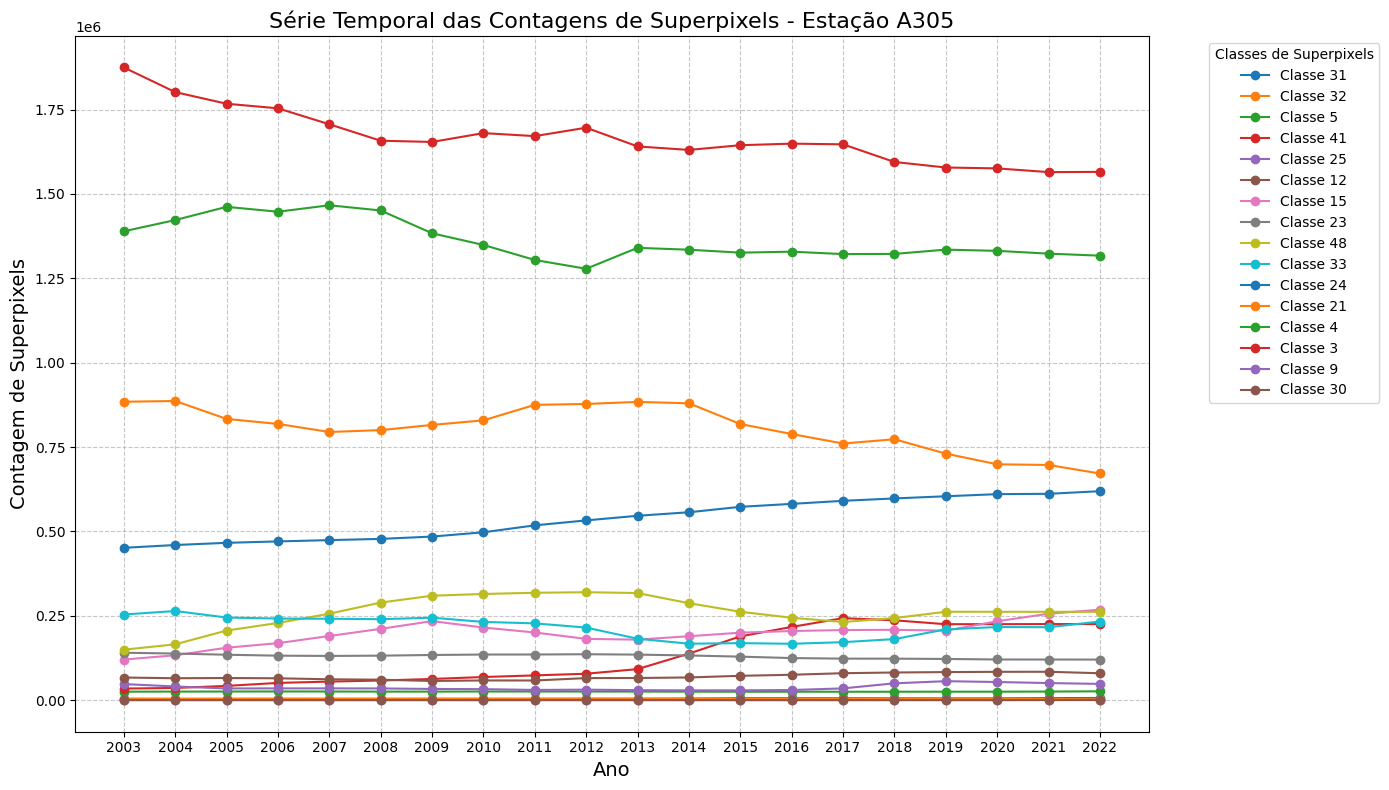

In [13]:
def plot_time_series(df_time_series, estacao_id):
    """
    Plotar a série temporal de contagem de superpixels por classe.

    Args:
    df_time_series (pd.DataFrame): DataFrame contendo a série temporal.
    estacao_id (str): ID da estação para o título do gráfico.
    """

    plt.figure(figsize=(14, 8))
    
    # Plotar cada classe de superpixel
    for class_id in df_time_series.columns:
        plt.plot(df_time_series.index, df_time_series[class_id], marker='o', label=f'Classe {class_id}')
    
    # Adicionar título e rótulos
    plt.title(f'Série Temporal das Contagens de Superpixels - Estação {estacao_id}', fontsize=16)
    plt.xlabel('Ano', fontsize=14)
    plt.ylabel('Contagem de Superpixels', fontsize=14)
    
    # Definir os ticks do eixo x para mostrar apenas anos inteiros
    plt.xticks(df_time_series.index, [str(int(year)) for year in df_time_series.index])
    
    # Adicionar uma grade
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adicionar a legenda fora do gráfico
    plt.legend(title='Classes de Superpixels', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar layout para evitar corte das legendas
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()

def create_time_series(output_base_dir, estacao_id, start_year, end_year):
    """
    Criar uma série temporal de contagem de superpixels por classe para uma estação específica,
    removendo IDs de classe com valor zero.

    Args:
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes foram salvos.
    estacao_id (str): ID da estação para criar a série temporal.
    start_year (int): Ano inicial da série temporal.
    end_year (int): Ano final da série temporal.

    Returns:
    pd.DataFrame: DataFrame contendo a série temporal.
    """

    # Criar um DataFrame para armazenar as contagens por ano
    time_series_data = {}

    for year in range(start_year, end_year + 1):
        tiff_path = os.path.join(output_base_dir, str(year), f'coverage_{estacao_id}_{year}.tif')

        if os.path.exists(tiff_path):
            sorted_class_counts = extract_classification_info(tiff_path)
            # Remover a entrada com ID de classe 0, se existir
            if 0 in sorted_class_counts:
                del sorted_class_counts[0]
            time_series_data[year] = sorted_class_counts
        else:
            print(f"Arquivo {tiff_path} não encontrado.")

    # Converter o dicionário em DataFrame
    df_time_series = pd.DataFrame(time_series_data).T.fillna(0)

    return df_time_series

# Definir parâmetros
output_base_dir = '../dados/raster_tiff_caating'
estacao_id = 'A305'
start_year = 2003
end_year = 2022

# Criar a série temporal
df_time_series = create_time_series(output_base_dir, estacao_id, start_year, end_year)
plot_time_series(df_time_series, estacao_id)

## Montagem do dataset para cada estação

In [14]:
def calcular_media_temperatura(dados, estacao_id):
    """
    Calcula a média anual das temperaturas máximas e mínimas para uma estação específica.

    Args:
    dados (pd.DataFrame): DataFrame contendo as colunas ['id_estacao', 'data', 'temperatura_max', 'temperatura_min', 'ano'].
    estacao_id (str): ID da estação para filtrar os dados.

    Returns:
    pd.DataFrame: DataFrame com a média anual das temperaturas.
    """
    # Filtrar os dados para a estação específica
    dados_estacao = dados[dados['id_estacao'] == estacao_id]

    # Agrupar por ano e calcular a média das temperaturas máxima e mínima
    temperatura_anual = dados_estacao.groupby('ano').agg(
        temperatura_max=('temperatura_max', 'max'),
        temperatura_min=('temperatura_min', 'min')
    ).reset_index()

    return temperatura_anual

def combinar_datasets(temperatura_anual, df_time_series):
    """
    Combina a média anual das temperaturas com a série temporal de contagem de superpixels.

    Args:
    temperatura_anual (pd.DataFrame): DataFrame com a média anual das temperaturas.
    df_time_series (pd.DataFrame): DataFrame contendo a série temporal de contagem de superpixels.

    Returns:
    pd.DataFrame: DataFrame combinado com as temperaturas e a contagem de superpixels por ano.
    """
    # Mesclar os dois DataFrames usando o ano como chave
    dataset_combinado = pd.merge(temperatura_anual, df_time_series, left_on='ano', right_index=True, how='inner')
    
    return dataset_combinado

# Função para criar o dataset completo para uma estação
def criar_dataset_completo(dados, output_base_dir, estacao_id, start_year, end_year):
    """
    Cria um dataset completo combinando as médias de temperatura e a contagem de superpixels.

    Args:
    dados (pd.DataFrame): DataFrame contendo as colunas ['id_estacao', 'data', 'temperatura_max', 'temperatura_min', 'ano'].
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes foram salvos.
    estacao_id (str): ID da estação para criar o dataset.
    start_year (int): Ano inicial da série temporal.
    end_year (int): Ano final da série temporal.

    Returns:
    pd.DataFrame: DataFrame completo com as temperaturas e a contagem de superpixels por ano.
    """
    # Calcular a média anual das temperaturas
    temperatura_anual = calcular_media_temperatura(dados, estacao_id)

    # Criar a série temporal de superpixels
    df_time_series = create_time_series(output_base_dir, estacao_id, start_year, end_year)

    # Combinar os datasets
    dataset_completo = combinar_datasets(temperatura_anual, df_time_series)

    return dataset_completo

In [25]:
output_base_dir = '../dados/raster_tiff_caating'
estacao_id = 'A305'
start_year = 2003
end_year = 2022

# DataFrame inicial com os dados de temperatura
dados_A305 = temperaturas[temperaturas['id_estacao'] == estacao_id]

# Criar o dataset completo para a estação A305
dataset_completo_A305 = criar_dataset_completo(dados_A305, output_base_dir, estacao_id, start_year, end_year)

In [26]:
dataset_completo_A305.head()

,ano,temperatura_max,temperatura_min,31,32,5,41,25,12,15,23,48,33,24,21,4,3,9,30
0,2003,32.600000,22.0,2574.0,4683.0,24970.0,34098.0,47489.0,66877.0,120126.0,140382.0,149318.0,253628.0,451289.0,884053.0,1389258.0,1874707.0,0.0,0.0
1,2004,32.400000,22.4,2761.0,4410.0,25162.0,35944.0,40349.0,64771.0,132801.0,137925.0,165220.0,263979.0,459531.0,886343.0,1422501.0,1801735.0,0.0,0.0
2,2005,33.700000,22.2,3344.0,4303.0,25392.0,42089.0,34459.0,65402.0,155191.0,134406.0,206048.0,244677.0,466019.0,833253.0,1461676.0,1767177.0,0.0,0.0
3,2006,32.100000,21.9,3677.0,4081.0,25559.0,50899.0,34696.0,64630.0,168667.0,131636.0,228522.0,241594.0,470223.0,818379.0,1447196.0,1753663.0,0.0,0.0
4,2007,33.823055,21.7,3748.0,3909.0,25426.0,54823.0,34702.0,61626.0,189931.0,130868.0,256069.0,241064.0,474057.0,794502.0,1466322.0,1706385.0,0.0,0.0


# Utilizando o coeficiente de correlação de Pearson

In [15]:
# Dicionário de mapeamento de IDs para nomes das classes
id_to_class_name = {
    1: "Formação Florestal",
    3: "Formação Florestal",
    4: "Formação Savânica",
    5: "Mangue",
    6: "Floresta Alagável",
    49: "Restinga Arbórea",
    11: "Campo Alagado e Área Pantanosa",
    12: "Formação Campestre ",
    32: "Apicum",
    29: "Afloramento Rochoso",
    50: "Restinga Herbácea",
    13: "Outras Formações Não Florestais",
    14: "Agropecuária",
    15: "Pastagem",
    18: "Agricultura",
    19: "Lavoura Temporária",
    39: "Soja",
    20: "Cana",
    40: "Arroz",
    62: "Algodão (beta)",
    41: "Outras Lavouras Temporárias",
    36: "Lavoura Perene",
    21: "Mosaico de Usos",
    46: "Café",
    47: "Citros",
    35: "Dendê (beta)",
    48: "Outras Lavouras Perenes",
    9: "Silvicultura",
    23: "Praia, Duna e Areal",
    24: "Área Urbanizada",
    30: "Mineração",
    25: "Outras Áreas não Vegetadas",
    33: "Rio, Lago e Oceano ",
    31: "Aquicultura",
    27: "Não Observado",
    26: "Corpo d'água",
    22: "Área não Vegetada",
    10: "Formação Natural não Florestal",
    0: "Não Classificado",

}

Text(143.72222222222223, 0.5, 'Classes de Vegetação')

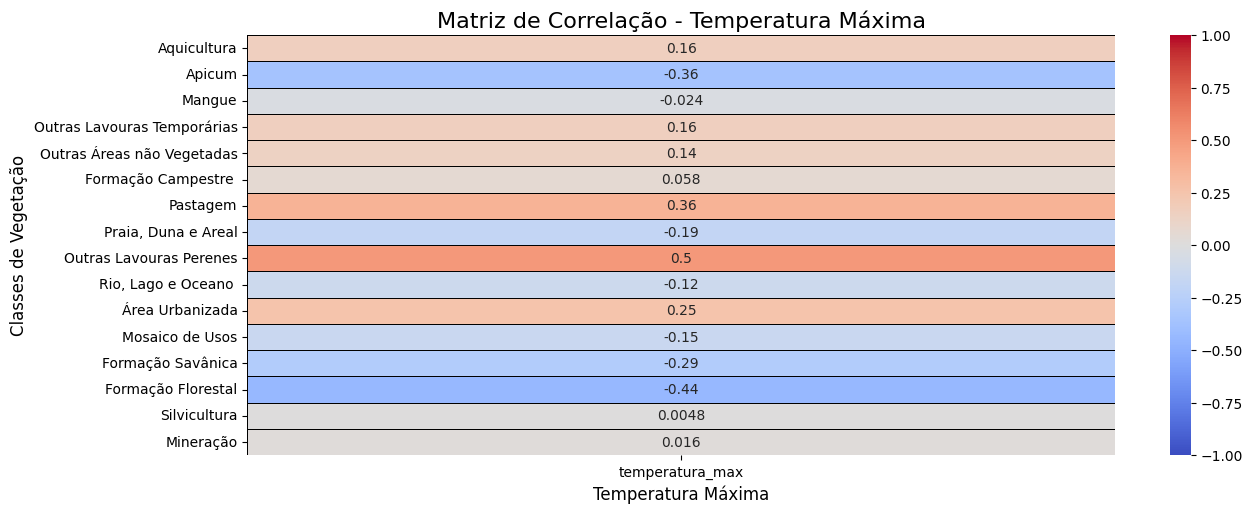

In [27]:
# Calcular a matriz de correlação para todas as colunas
correlation_matrix = dataset_completo_A305.corr(method='pearson')

# Focar apenas na correlação da temperatura máxima com as classes de vegetação
correlation_max = correlation_matrix[['temperatura_max']].drop(['ano', 'temperatura_max', 'temperatura_min'])

# Mapeando os nomes das classes no eixo y
correlation_max.index = correlation_max.index.map(id_to_class_name)

# Focar apenas na correlação da temperatura mínima com as classes de vegetação
correlation_min = correlation_matrix[['temperatura_min']].drop(['ano', 'temperatura_max', 'temperatura_min'])

# Mapeando os nomes das classes no eixo y
correlation_min.index = correlation_min.index.map(id_to_class_name)

# Configurar o tamanho do plot e criar duas subplots
plt.figure(figsize=(14, 12))

# Heatmap para Temperatura Máxima
plt.subplot(2, 1, 1)
sns.heatmap(correlation_max, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlação - Temperatura Máxima', fontsize=16)
plt.xlabel('Temperatura Máxima', fontsize=12)
plt.ylabel('Classes de Vegetação', fontsize=12)

Text(143.72222222222223, 0.5, 'Classes de Vegetação')

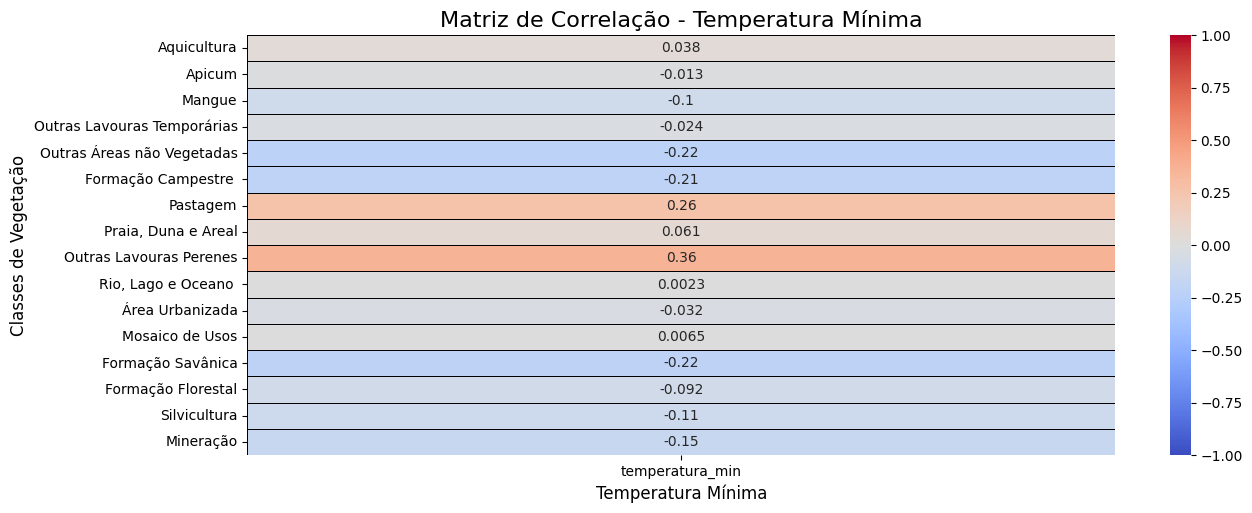

In [28]:
# Heatmap para Temperatura Mínima
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 2)
sns.heatmap(correlation_min, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlação - Temperatura Mínima', fontsize=16)
plt.xlabel('Temperatura Mínima', fontsize=12)
plt.ylabel('Classes de Vegetação', fontsize=12)

# Verificando a correlação utilizando mais de uma estação

In [16]:
# Lista de IDs de estações
estacoes = ['A305', 'A306', 'A307', 'A308', 'A408', 'A412', 'A310', 'A309',
       'A313', 'A526', 'A539', 'A543', 'A314', 'A315', 'A316', 'A317',
       'A318', 'A319', 'A321', 'A322', 'A323', 'A324', 'A325', 'A327',
       'A329', 'A330', 'A331', 'A332', 'A333', 'A334', 'A336', 'A337',
       'A339', 'A340', 'A413', 'A415', 'A416', 'A417', 'A418', 'A419',
       'A420', 'A423', 'A424', 'A425', 'A426', 'A428', 'A429', 'A430',
       'A432', 'A433', 'A435', 'A436', 'A439', 'A440', 'A441', 'A442',
       'A443', 'A342', 'A349', 'A343', 'A328', 'A345', 'A347', 'A348',
       'A350', 'A351', 'A354', 'A358', 'A359', 'A360', 'A365', 'A366',
       'A367', 'A448', 'A450', 'A559', 'A563', 'A449', 'A454', 'A451',
       'A453', 'A370', 'A371', 'A372', 'A373', 'A368', 'A369', 'A458']


In [17]:
# Carregar o shapefile do Voronoi previamente salvo
gdf_voronoi_clipped = gpd.read_file('../dados/shapefile_estacoes_divididas/estacoes_territorios_dividido.shp')

# Removendo regiões com uma área muito grande em estacoes_validas
gdf_voronoi_validas_filter = gdf_voronoi_clipped[gdf_voronoi_clipped.area < 0.8]
gdf_voronoi_validas_filter.head()

C:\Users\arthu\AppData\Local\Temp\ipykernel_7164\370575154.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_voronoi_validas_filter = gdf_voronoi_clipped[gdf_voronoi_clipped.area < 0.8]


,id_estacao,latitude,longitude,geometry
0,A336,-8.441667,-43.865556,"MULTIPOLYGON (((-43.28134 -8.66269, -43.66635 ..."
2,A416,-13.332500,-44.617500,"MULTIPOLYGON (((-44.05675 -12.61621, -44.05717..."
4,A308,-3.086667,-41.783056,"POLYGON ((-41.52190 -3.55804, -41.52253 -3.558..."
6,A539,-15.085958,-44.016036,"MULTIPOLYGON (((-43.82896 -15.61738, -44.27226..."
8,A526,-14.408333,-44.404167,"MULTIPOLYGON (((-44.44600 -13.85756, -44.44638..."


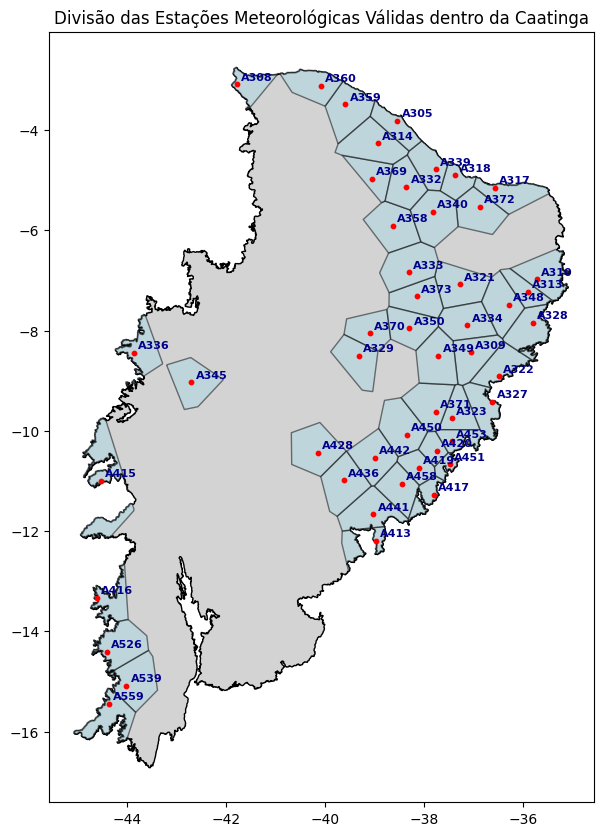

In [7]:
# Filtrar as estações meteorológicas para incluir apenas as estações válidas
stations_validas = stations_within_caatinga[stations_within_caatinga['id_estacao'].isin(gdf_voronoi_validas_filter['id_estacao'])]

# Plotar o resultado ajustado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o perímetro da Caatinga
caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os polígonos de Voronoi para as estações válidas
gdf_voronoi_validas_filter.plot(ax=ax, edgecolor='black', color='lightblue', alpha=0.5)

# Plotar as estações meteorológicas válidas
stations_validas.plot(ax=ax, color='red', markersize=10)

# Adicionar o ID das estações válidas no plot
for x, y, label in zip(stations_validas.geometry.x, stations_validas.geometry.y, stations_validas['id_estacao']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='darkblue', weight='bold')

plt.title('Divisão das Estações Meteorológicas Válidas dentro da Caatinga')
plt.show()

In [18]:
# Lista para armazenar os DataFrames de cada estação
datasets_completos = []
output_base_dir = '../dados/raster_tiff_caating'
start_year = 2003
end_year = 2022

# Iterar sobre cada estação e criar o dataset completo
for estacao_id in gdf_voronoi_validas_filter['id_estacao']:
    # Criar o dataset completo para a estação atual
    dataset_completo = criar_dataset_completo(temperaturas, output_base_dir, estacao_id, start_year, end_year)
    
    # Adicionar o ID da estação ao DataFrame
    dataset_completo['id_estacao'] = estacao_id
    
    # Adicionar o dataset da estação à lista
    datasets_completos.append(dataset_completo)

# Concatenar todos os DataFrames em um único DataFrame
dataset_completo_todas_estacoes = pd.concat(datasets_completos, ignore_index=True)

# Substituir valores NaN por 0
dataset_completo_todas_estacoes.fillna(0, inplace=True)

# Remover colunas onde todos os valores são 0
dataset_completo_todas_estacoes = dataset_completo_todas_estacoes.loc[:, (dataset_completo_todas_estacoes != 0).any(axis=0)]

# Exibir as primeiras linhas do DataFrame final
dataset_completo_todas_estacoes.head()

,ano,temperatura_max,temperatura_min,39,33,41,24,25,15,12,...,46,29,48,31,32,5,23,20,30,50
0,2007,35.600000,21.1,26.0,1268.0,1810.0,7346.0,46448.0,162724.0,134422.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008,40.600000,17.9,87.0,1268.0,1932.0,7440.0,44194.0,176902.0,133308.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,37.655296,22.2,2.0,1238.0,3698.0,7543.0,37061.0,200726.0,145177.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,34.400000,22.8,0.0,1179.0,4500.0,7632.0,29335.0,196661.0,189262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,40.900000,16.9,0.0,1092.0,3680.0,7730.0,21856.0,204480.0,209070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# quantos anos de dados temos para cada estação?
dataset_completo_todas_estacoes['id_estacao'].value_counts()

A308    20
A305    20
A310    19
A309    19
A313    17
A323    16
A329    16
A333    16
A314    16
A332    16
A336    16
A327    16
A417    16
A318    16
A317    16
A339    16
A416    16
A340    16
A539    16
A526    16
A334    16
A322    16
A415    16
A321    16
A413    16
A348    15
A328    15
A345    15
A359    15
A349    15
A441    15
A428    15
A420    15
A358    15
A419    15
A350    15
A436    15
A442    15
A360    14
A450     8
A559     7
A451     6
A372     6
A370     6
A371     6
A453     6
A373     6
A458     5
A369     5
Name: id_estacao, dtype: int64

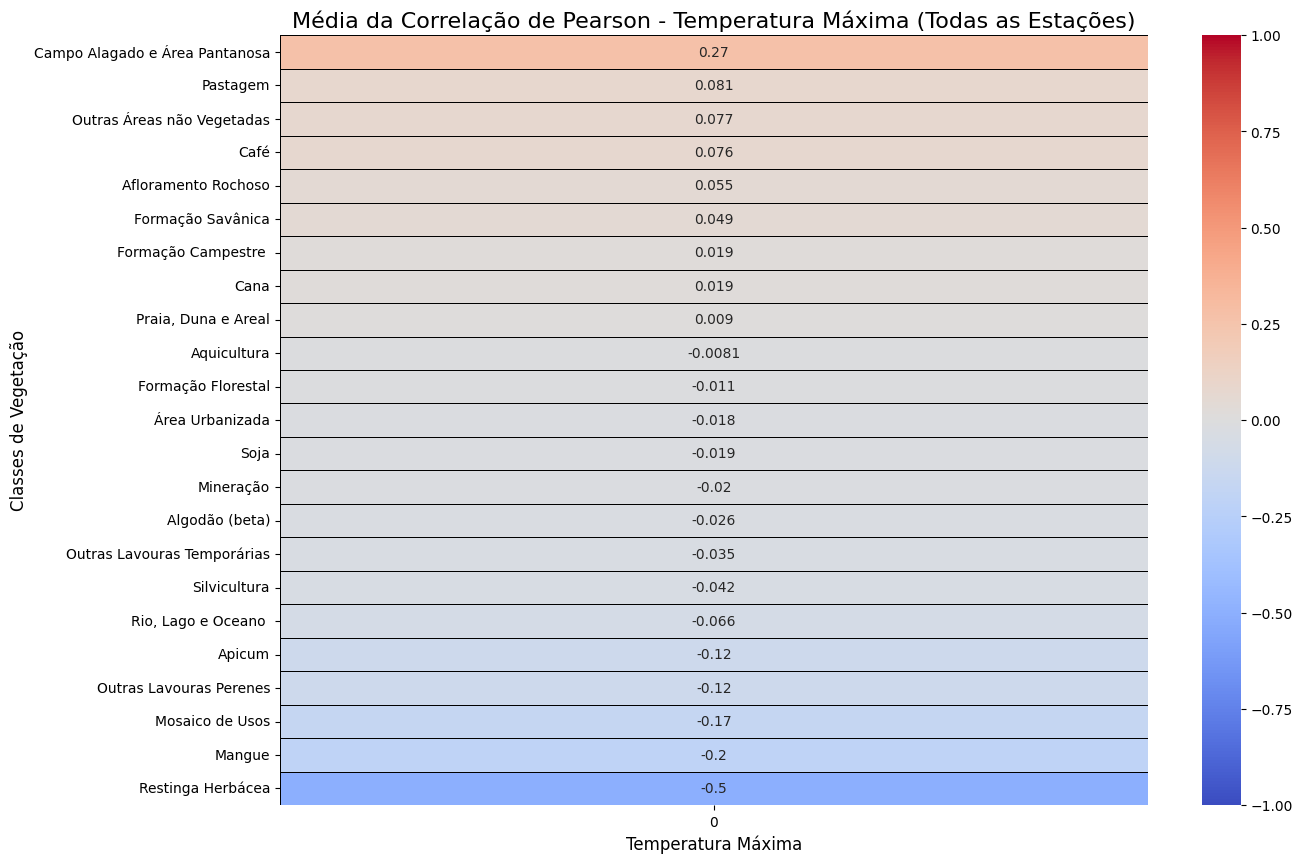

In [20]:
# Dicionário para armazenar as correlações de cada estação
correlacoes_por_estacao = {}

# Iterar por cada estação e calcular a correlação
for estacao_id in gdf_voronoi_validas_filter['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura máxima
    correlacao_temp_max = dados_para_correlacao.corr(method='pearson')['temperatura_max']
    
    # Remover a autocorrelação (correlação da temperatura máxima com ela mesma)
    correlacao_temp_max = correlacao_temp_max.drop(labels=['temperatura_max', 'temperatura_min'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao[estacao_id] = correlacao_temp_max

# Combinar todas as correlações e calcular a média
correlacoes_media = pd.DataFrame(correlacoes_por_estacao).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media.index = correlacoes_media.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media = correlacoes_media.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura máxima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Máxima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Máxima', fontsize=12)
plt.show()

### Campo Alagado e Área Pantanosa
- **Correlação:** 0.27
- **Análise:** A correlação de 0.27 entre a temperatura máxima e a classe de vegetação "Campo Alagado e Área Pantanosa" indica uma correlação positiva fraca. Isso sugere que, em regiões classificadas como "Campo Alagado e Área Pantanosa", há uma leve tendência de aumento na temperatura máxima associada à presença dessa classe de vegetação. No entanto, a correlação não é suficientemente forte para sugerir uma relação linear robusta, indicando que outros fatores também influenciam a temperatura nessas áreas.

### Restinga Herbácea
- **Correlação:** -0.5
- **Análise:** A correlação de -0.5 para a classe de vegetação "Restinga Herbácea" mostra uma correlação negativa moderada com a temperatura máxima. Isso implica que, em áreas classificadas como "Restinga Herbácea", há uma tendência de que um aumento na presença dessa vegetação esteja associado a uma diminuição na temperatura máxima. A correlação negativa sugere que "Restinga Herbácea" pode ter um efeito moderador na temperatura, possivelmente devido à influência de fatores como sombra, evapotranspiração ou características específicas do solo e vegetação que afetam o microclima.

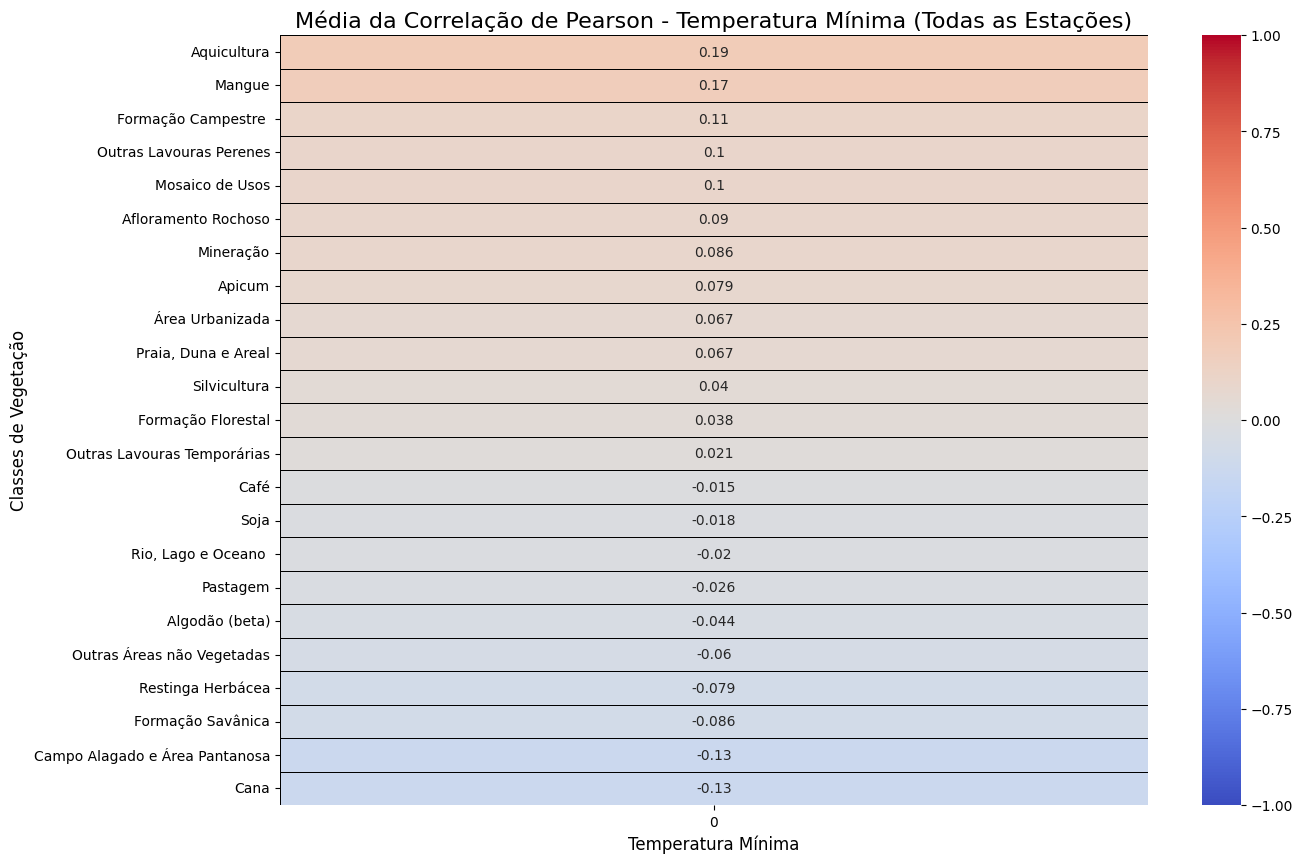

In [22]:
# Dicionário para armazenar as correlações de cada estação para temperatura mínima
correlacoes_por_estacao_min = {}

# Iterar por cada estação e calcular a correlação para a temperatura mínima
for estacao_id in gdf_voronoi_validas_filter['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura mínima
    correlacao_temp_min = dados_para_correlacao.corr(method='pearson')['temperatura_min']
    
    # Remover a autocorrelação (correlação da temperatura mínima com ela mesma)
    correlacao_temp_min = correlacao_temp_min.drop(labels=['temperatura_max', 'temperatura_min'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao_min[estacao_id] = correlacao_temp_min

# Combinar todas as correlações e calcular a média
correlacoes_media_min = pd.DataFrame(correlacoes_por_estacao_min).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media_min.index = correlacoes_media_min.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media_min = correlacoes_media_min.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura mínima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media_min.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Mínima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Mínima', fontsize=12)
plt.show()

# Usando dados de temperatura de satélite

In [53]:
# Caminho para o shapefile dos biomas
biomes_shp = '../dados/Biomas_250mil/lm_bioma_250.shp'

# Carregar o shapefile dos biomas
biomes = gpd.read_file(biomes_shp)

# Filtrar para obter apenas a Caatinga
caatinga = biomes[biomes['Bioma'] == 'Caatinga']

# Convertendo em GeoDataFrame
gdf_caatinga = gpd.GeoDataFrame(geometry=[caatinga.unary_union], crs=caatinga.crs)

C:\Users\arthu\AppData\Local\Temp\ipykernel_5408\2916740094.py:11: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_caatinga = gpd.GeoDataFrame(geometry=[caatinga.unary_union], crs=caatinga.crs)


In [54]:
# Definir a área de interesse (AOI) como o envelope da Caatinga
aoi = gdf_caatinga.envelope

# Obter os limites da AOI
x_min, y_min, x_max, y_max = aoi.bounds.values[0]

# Gerar a malha de pontos com latitude e longitude no CRS EPSG:4674
# Usamos passos pequenos para gerar pontos (0.5 graus) 
x_coords = np.arange(x_min, x_max, 0.5)
y_coords = np.arange(y_min, y_max, 0.5)
points = [Point(x, y) for x in x_coords for y in y_coords]
grid_gdf = gpd.GeoDataFrame(points, columns=['geometry'], crs=gdf_caatinga.crs)

# Filtrar pontos que estão fora da área da Caatinga
grid_gdf = grid_gdf[grid_gdf.geometry.within(gdf_caatinga.unary_union)]

C:\Users\arthu\AppData\Local\Temp\ipykernel_5408\1524549068.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_gdf = grid_gdf[grid_gdf.geometry.within(gdf_caatinga.unary_union)]


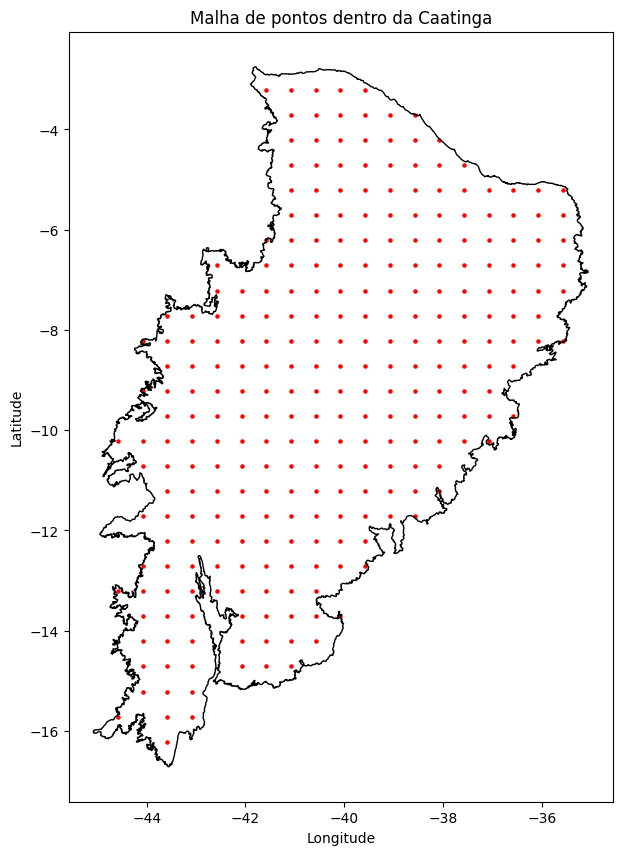

In [55]:
# Plotar a Caatinga e a malha de pontos
fig, ax = plt.subplots(figsize=(10, 10))
gdf_caatinga.boundary.plot(ax=ax, color='black', linewidth=1)
grid_gdf.plot(ax=ax, color='red', markersize=5)
plt.title('Malha de pontos dentro da Caatinga')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Atribuir IDs únicos a cada ponto
grid_gdf['id'] = ['SAT' + str(i) for i in range(len(grid_gdf))]

# Adicionar pontos fictícios ao redor do perímetro da Caatinga
minx, miny, maxx, maxy = caatinga.total_bounds
padding = 0.5  # Ajuste conforme necessário
extra_points = [
    [minx - padding, miny - padding],
    [minx - padding, maxy + padding],
    [maxx + padding, miny - padding],
    [maxx + padding, maxy + padding]
]

# Adicionar os novos pontos às coordenadas das estações
extra_points_geom = [Point(x, y) for x, y in extra_points]
extra_gdf = gpd.GeoDataFrame(extra_points_geom, columns=['geometry'], crs=gdf_caatinga.crs)

# Concatenar os pontos fictícios ao GeoDataFrame original
all_points_gdf = pd.concat([grid_gdf, extra_gdf], ignore_index=True)

# Extraindo coordenadas para criação dos polígonos de Voronoi
coords = np.array(list(zip(all_points_gdf.geometry.x, all_points_gdf.geometry.y)))

# Gerar os polígonos de Voronoi
vor = Voronoi(coords)

# Criar polígonos de Voronoi a partir dos vértices
polygons = []
for region in vor.regions:
    if not -1 in region and region:
        polygon = Polygon([vor.vertices[i] for i in region])
        polygons.append(polygon)

# Criar um GeoDataFrame com os polígonos de Voronoi
gdf_voronoi = gpd.GeoDataFrame(geometry=polygons, crs=all_points_gdf.crs)

# Verificar e corrigir geometrias inválidas antes do clipping
gdf_voronoi['geometry'] = gdf_voronoi['geometry'].buffer(0)

# Clipping com o polígono da Caatinga para garantir que todos os polígonos estejam dentro da região
gdf_voronoi_clipped = gpd.GeoDataFrame(
    geometry=[poly.intersection(gdf_caatinga.unary_union) for poly in gdf_voronoi.geometry if not poly.is_empty],
    crs=gdf_voronoi.crs
)

# Remover geometrias vazias
gdf_voronoi_clipped = gdf_voronoi_clipped[~gdf_voronoi_clipped.is_empty]

In [57]:
# Associar o polígono ao ID da estação mais próxima
def find_nearest_station(polygon, stations):
    centroid = polygon.centroid
    distances = stations.geometry.apply(lambda x: centroid.distance(x))
    nearest_station = stations.loc[distances.idxmin()]
    return nearest_station['id']

# Aplicar a função para encontrar o ID da estação
gdf_voronoi_clipped['id'] = gdf_voronoi_clipped.geometry.apply(lambda poly: find_nearest_station(poly, grid_gdf))

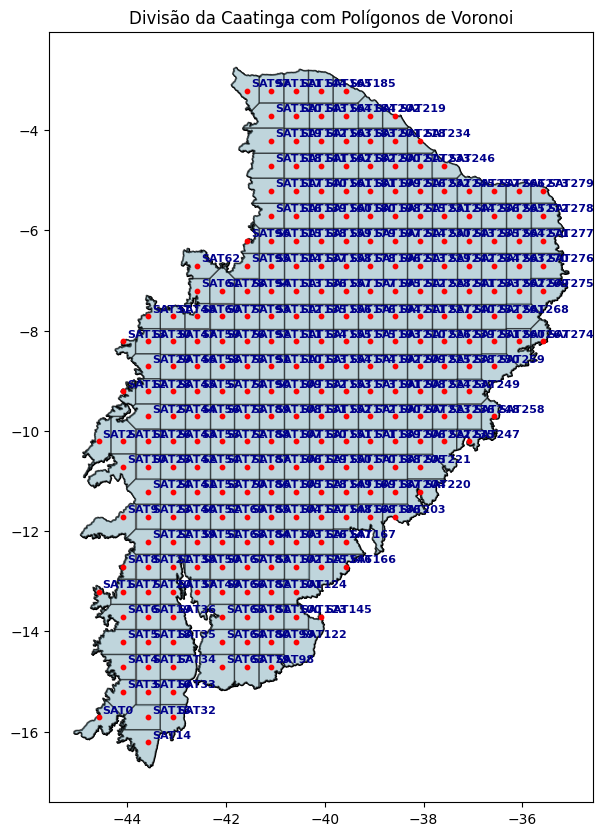

In [66]:
# Plotar o resultado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o perímetro da Caatinga
gdf_caatinga.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotar os polígonos de Voronoi
gdf_voronoi_clipped.plot(ax=ax, edgecolor='black', color='lightblue', alpha=0.5)

# Plotar os pontos
grid_gdf.plot(ax=ax, color='red', markersize=10)

# Adicionar o ID dos pontos no plot
for x, y, label in zip(grid_gdf.geometry.x, grid_gdf.geometry.y, grid_gdf['id']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, color='darkblue', weight='bold')

plt.title('Divisão da Caatinga com Polígonos de Voronoi')
plt.show()

In [65]:
# salvar o shapefile resultante
gdf_voronoi_clipped.to_file('../dados/shapefile_estacoes_divididas/caatinga_territorios_dividido_SAT.shp')

# Recuperando informação de temperatura para cada estação

In [60]:
import ee
import pandas as pd

In [61]:
ee.Authenticate(force=True)
service_account = 'pdi-618@projetopdi-430718.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, '../dados/projetopdi-430718-5d4f0b0f6064.json')
ee.Initialize(credentials)


Successfully saved authorization token.


In [62]:
def get_modis_temperature_by_year_range(lat, lon, start_year, end_year):
    """
    Função para obter as temperaturas médias máximas e mínimas de superfície terrestre do MODIS para uma latitude, 
    longitude e intervalo de anos específico.
    
    Parâmetros:
    - lat (float): Latitude do local.
    - lon (float): Longitude do local.
    - start_year (int): Ano inicial do intervalo.
    - end_year (int): Ano final do intervalo.
    
    Retorna:
    - Lista de temperaturas médias máximas e mínimas de superfície terrestre em Celsius para cada ano no intervalo.
    """
    
    # Inicializar o ponto de interesse
    point = ee.Geometry.Point(lon, lat)
    
    # Definir datas de início e fim com base no intervalo de anos
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'
    
    # Coleção de dados MODIS de temperatura da superfície terrestre
    dataset = ee.ImageCollection('MODIS/061/MOD11A1') \
        .filterBounds(point) \
        .filterDate(start_date, end_date) \
        .select(['LST_Day_1km', 'LST_Night_1km'])
    
    # Verificar se imagens foram encontradas
    if dataset.size().getInfo() == 0:
        raise ValueError("Nenhuma imagem encontrada para o intervalo de anos e localização especificados.")
    
    # Lista para armazenar as temperaturas médias máximas e mínimas por ano
    temperaturas_anuais = []
    
    # Loop através dos anos no intervalo
    for year in range(start_year, end_year + 1):
        year_start = f'{year}-01-01'
        year_end = f'{year}-12-31'
        
        # Filtrar a coleção de dados para o ano específico
        year_images = dataset.filterDate(year_start, year_end)
        
        # Calcular as temperaturas médias diurna e noturna para o ano
        mean_temp_day_image = year_images.select('LST_Day_1km').median()
        mean_temp_night_image = year_images.select('LST_Night_1km').median()
        
        # Amostrar os valores das temperaturas no ponto de interesse
        try:
            temp_day_dict = mean_temp_day_image.sample(region=point, scale=1000).first().getInfo()
            temp_night_dict = mean_temp_night_image.sample(region=point, scale=1000).first().getInfo()
            
            if temp_day_dict is None or 'properties' not in temp_day_dict or temp_night_dict is None or 'properties' not in temp_night_dict:
                raise ValueError("Amostragem falhou ou não retornou dados válidos.")
            
            # Converter de Kelvin para Celsius
            temp_max_celsius = temp_day_dict['properties']['LST_Day_1km'] * 0.02 - 273.15
            temp_min_celsius = temp_night_dict['properties']['LST_Night_1km'] * 0.02 - 273.15
            
            temperaturas_anuais.append({'year': year, 'max_temperature': temp_max_celsius, 'min_temperature': temp_min_celsius})
        
        except Exception as e:
            raise ValueError(f"Erro ao obter temperatura para o ano {year}: {e}")
    
    return temperaturas_anuais

In [63]:
# Extraindo as coordenadas e IDs das estações
stations_df = grid_gdf[['id', 'geometry']].copy()
stations_df['latitude'] = stations_df.geometry.y
stations_df['longitude'] = stations_df.geometry.x

# Definir o intervalo de anos
start_year = 2003
end_year = 2022

# Inicializar uma lista para armazenar todos os dados de temperatura
all_temperatures = []

# Iterar sobre cada estação no dataframe
for index, station in stations_df.iterrows():
    lat = station['latitude']
    lon = station['longitude']
    id_estacao = station['id']
    
    try:
        # Obter as temperaturas para a estação atual
        temperaturas = get_modis_temperature_by_year_range(lat, lon, start_year, end_year)
        
        # Adicionar o ID da estação aos dados de temperatura
        for temp in temperaturas:
            temp['id_estacao'] = id_estacao
            temp['latitude'] = lat
            temp['longitude'] = lon
            all_temperatures.append(temp)
    
    except ValueError as e:
        print(f"Erro ao obter temperaturas para a estação {id_estacao}: {e}")

# Converter a lista de temperaturas para um DataFrame
temperature_df = pd.DataFrame(all_temperatures)

# Reorganizar colunas para melhor visualização
temperature_df = temperature_df[['id_estacao', 'year', 'latitude', 'longitude', 'max_temperature', 'min_temperature']]

# Exibir o DataFrame final
temperature_df.head()

,id_estacao,year,latitude,longitude,max_temperature,min_temperature
0,SAT0,2003,-15.712637,-44.578141,28.046000,19.590000
1,SAT0,2004,-15.712637,-44.578141,26.398571,18.550000
2,SAT0,2005,-15.712637,-44.578141,27.144444,19.555000
3,SAT0,2006,-15.712637,-44.578141,25.992500,18.613333
4,SAT0,2007,-15.712637,-44.578141,27.308000,19.345000


In [64]:
# salvar o dataframe
temperature_df.to_csv('../dados/temperaturas_estacoes_modis.csv', index=False)

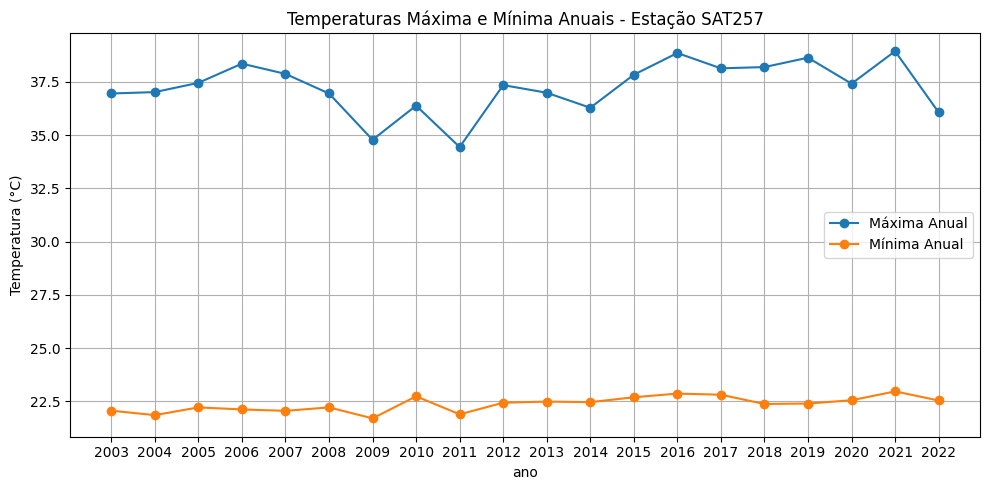

In [47]:
# abrir o arquivo CSV
temperature_df = pd.read_csv('../dados/temperaturas_estacoes_modis.csv')

# Filtrar os dados apenas para a estação SAT0
dados_SAT0 = temperature_df[temperature_df['id_estacao'] == 'SAT257']

# Agrupar por ano e calcular a temperatura máxima e mínima anual
temperatura_anual = dados_SAT0.groupby('year').agg(
    temperatura_max=('max_temperature', 'max'),
    temperatura_min=('min_temperature', 'min')
).reset_index()

# Plotar a série temporal anual
plt.figure(figsize=(10, 5))  # Ajusta o tamanho do gráfico
plt.plot(temperatura_anual['year'], temperatura_anual['temperatura_max'], label='Máxima Anual', marker='o')
plt.plot(temperatura_anual['year'], temperatura_anual['temperatura_min'], label='Mínima Anual', marker='o')

plt.xlabel('ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas Máxima e Mínima Anuais - Estação SAT257')
plt.xticks(range(temperatura_anual['year'].min(), temperatura_anual['year'].max() + 1))  # Define os ticks do eixo x para cada year
plt.legend()
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Separar os arquivos geotif por estação

In [70]:
def process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped):
    """
    Processa todos os arquivos GeoTIFF na pasta segmentacoes para todas as estações,
    salvando os resultados em pastas separadas por ano.

    Args:
    segmentacoes_dir (str): Caminho para a pasta contendo os arquivos GeoTIFF de entrada.
    output_base_dir (str): Diretório base onde os GeoTIFFs resultantes serão salvos.
    gdf_voronoi_clipped (GeoDataFrame): GeoDataFrame contendo os polígonos de Voronoi.
    """

    # Listar todos os arquivos GeoTIFF na pasta segmentacoes
    tiff_files = glob.glob(os.path.join(segmentacoes_dir, '*.tif'))

    # Obter os IDs únicos das estações
    estacao_ids = gdf_voronoi_clipped['id_estacao'].unique()

    for tiff_file in tiff_files:
        # Extrair o ano do nome do arquivo GeoTIFF
        year = os.path.basename(tiff_file).split('_')[-1].split('.')[0]

        # Criar diretório para o ano se não existir
        year_dir = os.path.join(output_base_dir, year)
        os.makedirs(year_dir, exist_ok=True)

        for estacao_id in estacao_ids:
            # Aplicar a função para salvar o TIFF mascarado
            save_masked_tiff(tiff_file, estacao_id, year_dir, gdf_voronoi_clipped)
            print(f"Salvo: {year_dir}/coverage_{estacao_id}_{year}.tif")


# Definir caminhos
segmentacoes_dir = '../dados/segmentacoes'
output_base_dir = '../dados/raster_tiff_caating_sat'

# Executar o processamento para todos os arquivos e estações
process_all_tiffs(segmentacoes_dir, output_base_dir, gdf_voronoi_clipped)

Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT144_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT121_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT13_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT11_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT2_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT12_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT165_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT14_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT35_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT153_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT132_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT5_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT18_2003.tif
Salvo: ../dados/raster_tiff_caating_sat\2003/coverage_SAT0_2003.tif
Salvo: ../dados/raster_tiff_caat

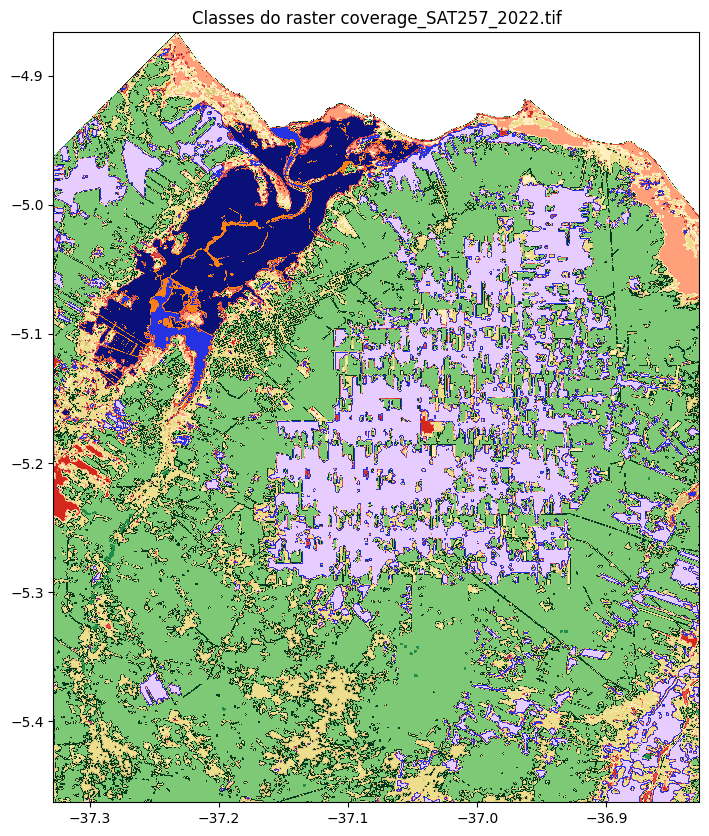

In [48]:
output_tif_path = '../dados/raster_tiff_caating_sat/2022/coverage_SAT257_2022.tif'
plot_tiff_with_classes(output_tif_path)

In [149]:
# Extrair informações do GeoTIFF salvo
sorted_class_counts = extract_classification_info(output_tif_path)

# Exibir as classificações e contagens
print("Contagem de superpixels por classe (ordenado):", sorted_class_counts)

Contagem de superpixels por classe (ordenado): {np.uint8(30): np.int64(1338), np.uint8(25): np.int64(3320), np.uint8(33): np.int64(4915), np.uint8(0): np.int64(7424), np.uint8(41): np.int64(21121), np.uint8(12): np.int64(27223), np.uint8(24): np.int64(42642), np.uint8(21): np.int64(123141), np.uint8(15): np.int64(269771), np.uint8(4): np.int64(1410352), np.uint8(3): np.int64(1537202)}


# Montagem do dataset para cada estação

In [178]:
# Carregar o shapefile do Voronoi previamente salvo
gdf_voronoi_clipped = gpd.read_file('../dados/shapefile_estacoes_divididas/caatinga_territorios_dividido_SAT.shp')
gdf_voronoi_clipped.rename(columns={'id': 'id_estacao'}, inplace=True)
gdf_voronoi_clipped.head()

,id_estacao,geometry
0,SAT144,"POLYGON ((-40.32814 -3.46264, -40.82814 -3.462..."
1,SAT121,"POLYGON ((-40.82814 -3.46264, -41.32814 -3.462..."
2,SAT13,"POLYGON ((-43.91258 -8.54708, -43.91273 -8.547..."
3,SAT11,"MULTIPOLYGON (((-44.32814 -9.72916, -44.32813 ..."
4,SAT2,"MULTIPOLYGON (((-44.32814 -9.71264, -44.32814 ..."


In [179]:
# abrir o arquivo CSV com as temperaturas
temperature_df = pd.read_csv('../dados/temperaturas_estacoes_modis.csv')
# alterar nome max_temperature para temperatura_max e min_temperature para temperatura_min
temperature_df.rename(columns={'max_temperature': 'temperatura_max', 'min_temperature': 'temperatura_min', 'year': 'ano'}, inplace=True)
temperature_df.head()

,id_estacao,ano,latitude,longitude,temperatura_max,temperatura_min
0,SAT0,2003,-15.712637,-44.578141,28.046000,19.590000
1,SAT0,2004,-15.712637,-44.578141,26.398571,18.550000
2,SAT0,2005,-15.712637,-44.578141,27.144444,19.555000
3,SAT0,2006,-15.712637,-44.578141,25.992500,18.613333
4,SAT0,2007,-15.712637,-44.578141,27.308000,19.345000


In [193]:
# Lista para armazenar os DataFrames de cada estação
datasets_completos = []
output_base_dir = '../dados/raster_tiff_caating_sat'
start_year = 2003
end_year = 2022

# Iterar sobre cada estação e criar o dataset completo
for estacao_id in gdf_voronoi_clipped['id_estacao']:
    # Criar o dataset completo para a estação atual
    dataset_completo = criar_dataset_completo(temperature_df, output_base_dir, estacao_id, start_year, end_year)
    
    # Adicionar o ID da estação ao DataFrame
    dataset_completo['id_estacao'] = estacao_id
    
    # Adicionar o dataset da estação à lista
    datasets_completos.append(dataset_completo)

# Concatenar todos os DataFrames em um único DataFrame
dataset_completo_todas_estacoes = pd.concat(datasets_completos, ignore_index=True)

# Substituir valores NaN por 0
dataset_completo_todas_estacoes.fillna(0, inplace=True)

# Remover colunas onde todos os valores são 0
dataset_completo_todas_estacoes = dataset_completo_todas_estacoes.loc[:, (dataset_completo_todas_estacoes != 0).any(axis=0)]

# Exibir as primeiras linhas do DataFrame final
dataset_completo_todas_estacoes.head()

,ano,temperatura_max_median,temperatura_min_median,41,12,31,24,32,25,5,...,39,62,29,46,11,9,20,49,50,13
0,2003,30.938,23.140000,782.0,1015.0,5748.0,6090.0,13199.0,24262.0,44307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,30.710,23.300000,739.0,1095.0,5889.0,6236.0,13400.0,22710.0,44468.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,35.570,23.700000,7.0,908.0,5883.0,6598.0,13387.0,22402.0,44625.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,31.055,23.240000,0.0,695.0,5917.0,6842.0,13444.0,23569.0,44735.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,32.840,23.463333,0.0,993.0,6035.0,7180.0,13387.0,26257.0,44743.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# quantos anos de dados temos para cada estação?
dataset_completo_todas_estacoes['id_estacao'].value_counts()

id_estacao
SAT93     20
SAT144    20
SAT121    20
SAT13     20
SAT11     20
          ..
SAT18     20
SAT5      20
SAT132    20
SAT153    20
SAT35     20
Name: count, Length: 280, dtype: int64

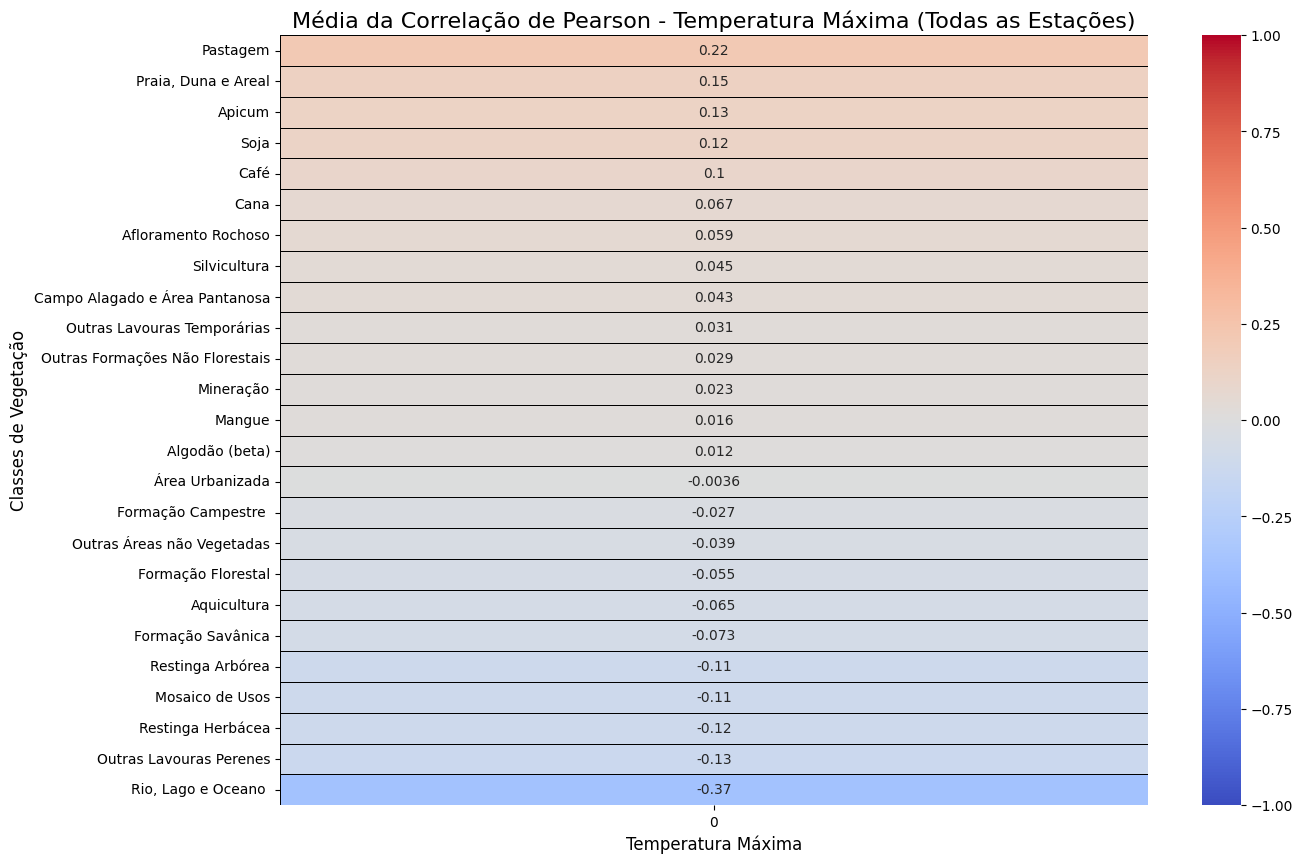

In [198]:
# Dicionário para armazenar as correlações de cada estação
correlacoes_por_estacao = {}

# Iterar por cada estação e calcular a correlação
for estacao_id in gdf_voronoi_clipped['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura máxima
    correlacao_temp_max = dados_para_correlacao.corr(method='pearson')['temperatura_max_median']
    
    # Remover a autocorrelação (correlação da temperatura máxima com ela mesma)
    correlacao_temp_max = correlacao_temp_max.drop(labels=['temperatura_max_median', 'temperatura_min_median'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao[estacao_id] = correlacao_temp_max

# Combinar todas as correlações e calcular a média
correlacoes_media = pd.DataFrame(correlacoes_por_estacao).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media.index = correlacoes_media.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media = correlacoes_media.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura máxima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Máxima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Máxima', fontsize=12)
plt.show()

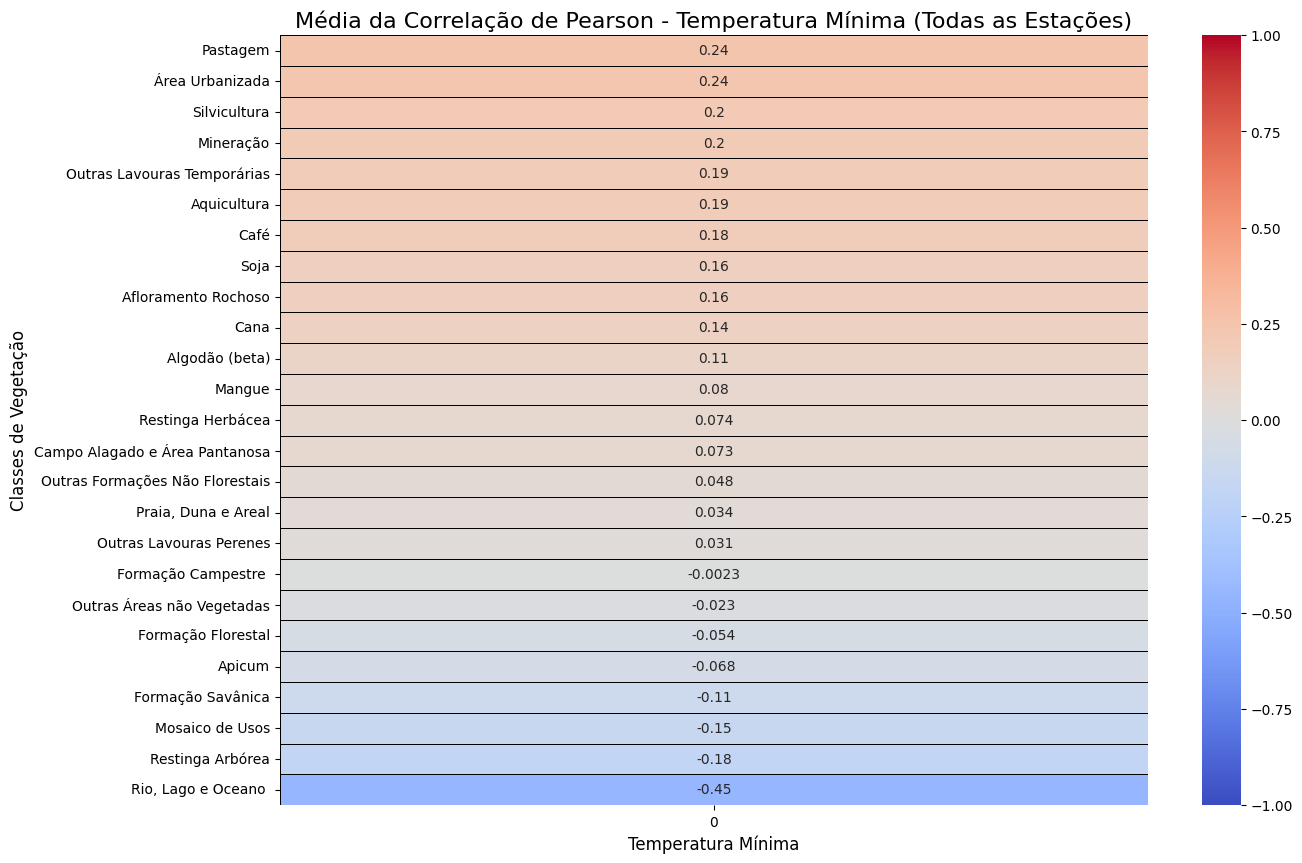

In [199]:
# Dicionário para armazenar as correlações de cada estação para temperatura mínima
correlacoes_por_estacao_min = {}

# Iterar por cada estação e calcular a correlação para a temperatura mínima
for estacao_id in gdf_voronoi_clipped['id_estacao']:
    # Filtrar os dados para a estação atual
    dados_estacao = dataset_completo_todas_estacoes[dataset_completo_todas_estacoes['id_estacao'] == estacao_id]
    
    # Remover colunas irrelevantes antes de calcular a correlação
    colunas_para_remover = ['ano', 'id_estacao']
    dados_para_correlacao = dados_estacao.drop(columns=colunas_para_remover)
    
    # Calcular a correlação de Pearson para a temperatura mínima
    correlacao_temp_min = dados_para_correlacao.corr(method='pearson')['temperatura_min_median']
    
    # Remover a autocorrelação (correlação da temperatura mínima com ela mesma)
    correlacao_temp_min = correlacao_temp_min.drop(labels=['temperatura_max_median', 'temperatura_min_median'])
    
    # Armazenar a correlação para a estação atual
    correlacoes_por_estacao_min[estacao_id] = correlacao_temp_min

# Combinar todas as correlações e calcular a média
correlacoes_media_min = pd.DataFrame(correlacoes_por_estacao_min).mean(axis=1)

# Mapeando os nomes das classes no eixo y
correlacoes_media_min.index = correlacoes_media_min.index.map(id_to_class_name)

# Ordenar as correlações da maior para a menor
correlacoes_media_min = correlacoes_media_min.sort_values(ascending=False)

# Plotar a correlação de Pearson média para a temperatura mínima
plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes_media_min.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black', cbar=True)
plt.title('Média da Correlação de Pearson - Temperatura Mínima (Todas as Estações)', fontsize=16)
plt.ylabel('Classes de Vegetação', fontsize=12)
plt.xlabel('Temperatura Mínima', fontsize=12)
plt.show()

# Modelagem Preditiva

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [201]:
# Supondo que a variável alvo seja temperatura_max_median
X = dataset_completo_todas_estacoes.drop(columns=['temperatura_max_median', 'temperatura_min_median','ano','id_estacao'])
y = dataset_completo_todas_estacoes['temperatura_max_median']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definindo o modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definindo os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [300,400,500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Definindo o GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=2, verbose=1)

# Treinando o modelo com GridSearch
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_

# Previsões
y_pred = best_model.predict(X_test_scaled)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores Parâmetros: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}
MAE: 1.4139670462649419
R²: 0.6593417454331874
